## Expression forms in a notebook

Any expression inside a Code Block is valid in a notebook cell

If the expression is a single expression, the ending dot can be omitted, otherwise, the dot should not be omitted

In [1]:
# Unary Expression

Reflect version

0.0.9.2-boehm-gc

In [1]:
# Binary Expression

2 + 2 * 4 # Yes, we don't respect PEMDAS

16

All expressions can be terminated with a dot

In [2]:
2 pow: 5.

32

In [3]:
# Or not

2 pow: 5

32

### Variables
Variables can be used normally (preceeded with `var` or `my`).

In [4]:
var someVar is 123.

123

In [5]:
# You may reuse these variables (it only makes sense after all)

someVar + 64 / 43

4.3488372093

In [6]:
var plus-a-big-number is {:inp
    ^2 pow: 15, + inp.
}.

[res:Block]

### Function calls 
They're pretty normal

In [7]:
plus-a-big-number[1024]

33792

## Writing to Jupyter's stdout stream

use `JupyterPen` to write there

Just be mindful that at the current state, too many subsequent outputs will break the kernel
(50 ms delay seems to work well enough)

In [8]:
JupyterPen write: 'This goes in stdout'.

This goes in stdout

[res:Object]

### Imports and stuff

You can just send normal messages to `import`


In [9]:
import
    Library/Functional/PatternMatch: 'match'.

Array ← ([:Block])

In [10]:
# Using these imported variables is also, just normal

var fizzbuzz is {:iter
    Clock wait: 50 ms.
    JupyterPen writeln: (
        [(iter mod: 3), (iter mod: 5)] `match` {
            [0, 0] => 'FizzBuzz'.
            [0, _] => 'Fizz'.
            [_, 0] => 'Buzz'.
            otherwise => iter toString.
        }).
}.

20 times: fizzbuzz.

FizzBuzz
1
2
3
4
5
Fizz
7
8
9
Buzz
11
12
13
14
FizzBuzz
16
17
18
19


20

In [11]:
# Todo: More shit

Nil

### Showing stuff on Jupyter Notebook

All the outputs are directed through the `Display` object
which can display objects in multiple modes

- Files 

        Files are checked for their mime type, if it is a supported mime type (through `Registery`), 
        its contents are read and displayed

- Strings

        Strings are always shown as plain text

- Plots
        Plots are rendered as images if they've been initialised


- EncodedDisplayObject

        These are rendered directly as they claim to be

Any other object is converted to its string representation and shown as plaintext


You can customise the display mode by calling `Display` and giving it some options

The supported options as of this moment are:

- `inspect`
        displays an inspection of the object
- `html` or `HTML`
        forces the object's string representation to be rendered as HTML
- `text` or `plain`
        forces the render to be plain text
- `table`
        displays the given object as a table
        array of arrays    -> table (no header)
        array of non-array -> list
        any other object   -> single cell

In [12]:
Display[[[1,2,3], [5,6,7], [8,9], [10,11,12]], \table]

[Object]

In [13]:
Display['<b>AAAAAAAAAAAAAAAAAA</b>', \html]

[Object]

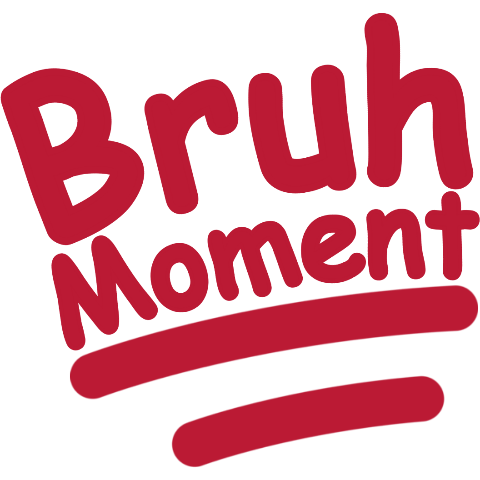

In [1]:
File new: '~/Desktop/emoji/bruh.png'

In [1]:
Display[(File new: '~/Desktop/emoji/bruh.png'), \plain]

[File:~/Desktop/emoji/bruh.png]

In [2]:
Display[Display, \inspect]

[Object]

In [3]:
# now with more plots!

Nil

In [4]:
Plot new: {
      title: 'Sine Wave Example'.
      xrange: '[-10:30]'.
      yrange: '[-3:3]'.
      ylabel: 'x'.
      xlabel: 'sin(x)'.

      var x is (0..5000) fmap: \:x x / 100, toArray.
      var y is x fmap: \:x x pow: 2, sin.
      var y2 is x fmap: \:x x sin abs.

      data: [
        (DataSet new init: 'sin(x)' withBlock: {
          with: 'lines'.
          title: 'String function'.
          linewidth: 4.
        }),
        (DataSet new init: [x, y] withBlock: {
          with: 'lines'.
          title: 'Array data'.
        }),
        (DataSet new init: [x, y2] withBlock: {
          with: 'lines'.
          title: 'Array data |sin(x)|'.
        })
      ].
}

[Object]

In [ ]:
SPlot new: {
      title: 'Sine Wave Example'.
      xrange: '[-10:30]'.
      yrange: '[-3:3]'.
      ylabel: 'x'.
      xlabel: 'sin(x)'.

      var x is (0..5000) fmap: \:x x / 100, toArray.
      var y is x fmap: \:x x pow: 2, sin.
      var y2 is x fmap: \:x x sin abs.

      data: [
        (DataSet new init: [x, y, y2] withBlock: {
          with: 'lines'.
          title: 'Array data'.
        })
      ].
}

[Object]

In [2]:
var plot is SPlot new: {
    data: [
        (DataSet new init: [[x, (x pow: 2), (x pow: 3)],, (x: 0..100)] zip withBlock: {
          with: 'lines'.
        })
    ]
}

[Object]

In [3]:
Display[plot, \table]

0,0,0
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216
7,49,343
8,64,512
9,81,729
10,100,1000


### 'magic' commands

A code cell with content that starts with a colon

i.e. `:<optional command> <arguments>`

Only a few 'magic' commands are available at the moment: 

- `: <shell expr>`
        Evaluates the expression in an `sh` shell
        
- `:time <expr>`
        Displays the time it took to evaluate the expression (in stdout of the cell)


In [ ]:
: ls -alh example.ipynb

In [ ]:
:time 100 times: {:i i -=: 1. }